In [ ]:
'''
<의사결정나무(Decision Tree)>

- 여러 규칙을 순차적으로 적용하면서 분류나 예측을 진행하는 단순 알고리즘 모델
- 분류(Classification)와 회귀(Regression)분석에서 모두 사용가능하며 분류분석에 주로 사용됨
- 의사결정나무에서 확장된 모델이 랜덤 포레스트(Random Forest)

- 독립변수 : 연속형 데이터(숫자 값)
- 종속변수 : 범주형 데이터들(구분 가능 값)

- 순서
1. 데이터 생성
2. 전처리
3. 학습모델 생성 (fit() 함수 사용)
4. 모델 테스트(예측) (predict() 함수 사용)
5. 평가
'''

### 예시1 - 사람의 키와 머리카락의 길이로 성별 예측
- 종속변수 : 성별
- 독립변수 : 키, 머리카락 길이

In [8]:
# 의사결정나무 라이브러리
from sklearn import tree

In [18]:
### 데이터 생성
# 종속변수 : x
x = [[180, 15],[177, 42],[156, 35],[174, 5],[166, 33]]
# 종속변수 : y
y = [['Man'],['Women'],['Women'],['Man'],['Women']]
label_names = ['Height', 'Hair Length']

In [19]:

### 모델 객체 생성하기
# - criterion : 품질 측정방법(지니불순도 방법, 엔트로피 방법)
#   - 엔트로피 : 균형잡힌 트리를 생성
#   - 지니불순도 : 가장 빈도 높은 클래스를 먼저 분할하는 방법
#   - random_state : seed 설정과 동일한 개념, 보통 0과 42 숫자 사용

model = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
print('model = \n', model)
print('---------------------------------')

model = 
 DecisionTreeClassifier(criterion='entropy', random_state=0)
---------------------------------


In [20]:
### 학습하기
fit = model.fit(x, y)
print('fit = \n', fit)
print('---------------------------------')

fit = 
 DecisionTreeClassifier(criterion='entropy', random_state=0)
---------------------------------


In [21]:
### 학습모델 평가하기

# 결정계수
# - 값의 범위 : 0 ~ 1
# - 1에 가까울 수록 학습모델이 우수함
# - 결과값에 * 100을 하면 백분율로 표시됨
# - 일반적으로 0.3 이상이면 학습모델 선정
accuracy_score = fit.score(x, y)
print('accuracy_score =', accuracy_score)

accuracy_score = 1.0


In [22]:
### 예측(테스트) 하기
# Test 데이터 생성
mydata = [[177, 42]]

# 예측(테스트)
# 예측시에는 독립변수만 넣기(답은 X)
# 답은 예측결과
pred = fit.predict(mydata)
print('예측결과 =', pred)

예측결과 = ['Women']


In [23]:
### 시각화
# pip 라이브러리 설치 : pip install pydotplus
# conda 라이브러리 설치 : -c conda-forge graphviz
import pydotplus
import graphviz
import collections

dot_data = digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Hair Length <= 24.0\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]", fillcolor="#bddef6"] ;
1 [label="entropy = 0.0\nsamples = 2\nvalue = [2, 0]", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="entropy = 0.0\nsamples = 3\nvalue = [0, 3]", fillcolor="#399de5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}
---------------------------------
graph = <pydotplus.graphviz.Dot object at 0x000001C74FD22430>
---------------------------------
edges = defaultdict(<class 'list'>, {})
---------------------------------
edges 처리 후 분수 = defaultdict(<class 'list'>, {'0': [1, 2]})
---------------------------------


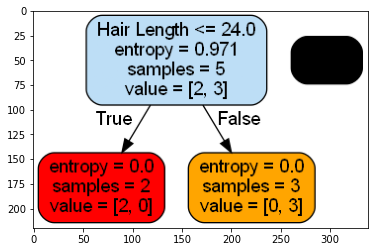

In [24]:
### 그래프 그리기
# model : 위에서 생성한 모델
# feature_name : 독립변수 각 항목 이름
# out_file : 파일로 저장할건지 여부
# filled : 도형 안쪽 칠할건지 여부
# rounded : 도형 사각 영역에 라운드 넣을 건지 여부
# 그래프 속성 결정

dot_data = tree.export_graphviz(model, 
                                feature_names = label_names,
                                out_file = None, 
                                filled = True,
                                rounded = True)

print('dot_data =', dot_data)
print('---------------------------------')

# 최종 사용할 그래프
graph = pydotplus.graph_from_dot_data(dot_data)
print('graph =', graph)
print('---------------------------------')

# 독립변수의 갯수 만큼 색상 지정
color = ('red','orange')

# list type 변경
edges = collections.defaultdict(list)
print('edges =',edges)
print('---------------------------------')

# 트리 데이터 생성하기
for e in graph.get_edge_list():
    edges[e.get_source()].append(int(e.get_destination()))

print('edges 처리 후 분수 =', edges)
print('---------------------------------')

# 트리 그리기
for e in edges :
    edges[e].sort()
    
    for i in range(2) :
        dest = graph.get_node(str(edges[e][i]))[0]
        dest.set_fillcolor(color[i])
        
# 그래프 객채를 이미지 파일로 생성
graph.write_png('./tree.png')

# 생성된 png 이미지 읽기
import matplotlib.pyplot as plt

img = plt.imread('./tree.png')

# 이미지 보여주기
plt.imshow(img)
plt.show()